# UAS KECERDASAN BUATAN

Nama : Prazna Paramitha Avi

Prediksi Kelembapan(Humidity) menggunakan Decision Tree
Pada notebook ini akan dilakukan prediksi humidity pada pukul 3 siang berdasarkan data cuaca pukul 9 pagi.

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv(".\daily_weather.csv")
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


Pengecekan nilai null pada datasheet 

In [3]:
data.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

Data Cleansing

In [4]:
del data['number']
data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

Row yang bernilai null dihapuskan

In [5]:
data = data.dropna()
data

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


Binary Classification Target

Data pada kolom 'relative_humidity_3pm' akan di label '1' jika nilai humidity nya lebih dari 24.99. 
Label 1 ini berarti tingkat humidity tinggi dan label 0 berarti tingkat humiditas rendah.

In [6]:
clean_data = data.copy() 
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99) * 1
print(clean_data['high_humidity_label'])
y = clean_data[['high_humidity_label']].copy()

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int32


Feature untuk menentukan prediksi humidity pada pukul 3 PM

In [7]:
time = '9am'
features = list(clean_data.columns[clean_data.columns.str.contains(time)])
features.remove('relative_humidity_9am')
x = clean_data[features].copy()
x

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0
...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0


Splitting Data Test dan Data Training

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 266)

Fit model pada data training
Model akan dibuat dengan menggunakan Decision Tree Classifier dengan menggunakan fungsi fit

In [9]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
print(humidity_classifier.fit(x_train,y_train))
type(humidity_classifier)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)


sklearn.tree._classes.DecisionTreeClassifier

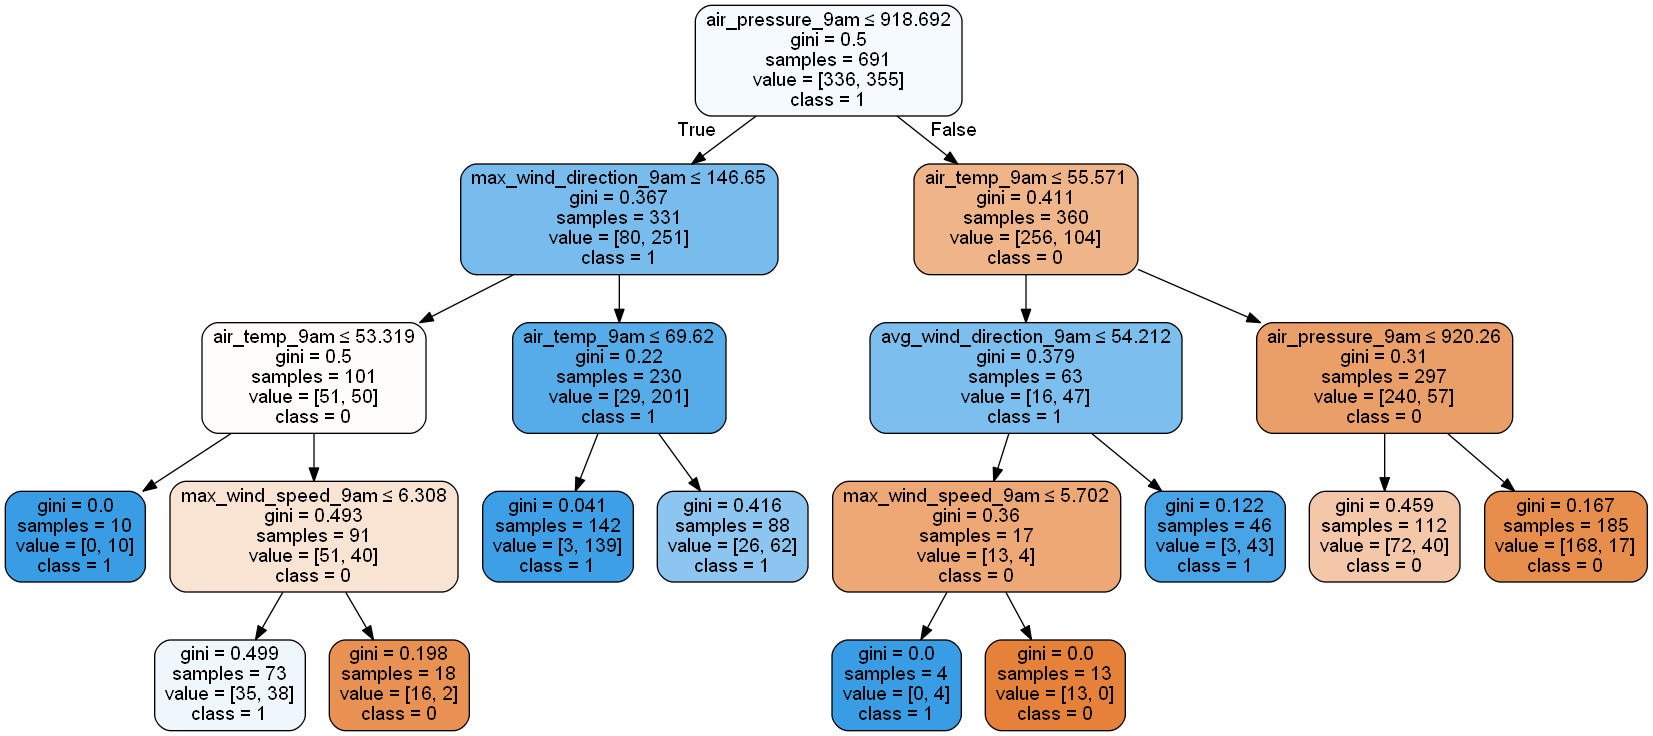

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('humidity.png')
Image(graph.create_png())

In [11]:
graph.write_png("dt.png")

True

Test model dengan menggunakan data test

In [12]:
predictions = humidity_classifier.predict(x_test)

In [13]:
y_test

,high_humidity_label
433,0
565,1
671,0
104,0
382,1
...,...
36,1
310,1
809,1
905,1


In [14]:
column_values = ['prediction'] 
df = pd.DataFrame(data = predictions[:],columns = column_values) 
df

,prediction
0,0
1,1
2,0
3,0
4,0
...,...
368,1
369,1
370,1
371,1


Akuransi Data

In [15]:
accuracy_score(y_test, y_pred = predictions)

0.7774798927613941

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred = predictions)

0.2225201072386059